In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class step_fn(object):
    def __init__(self):
        super(step_fn, self)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def step(self, x):
        return (x > 0).astype(np.int)
    
    def ReLU(self, x):
        return np.maximum(0, x)

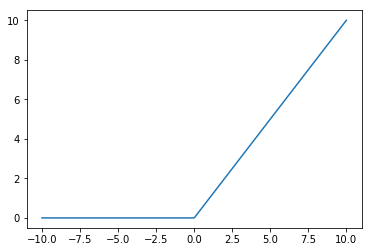

In [27]:
x = np.array([-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = step_fn().ReLU(x)
plt.plot(x, y)

In [37]:
class NN(object):
    def __init__(self, step=step_fn()):
        self.network = {}
        self.network['W1'] = np.array([[.1, .3, .5], [.2 , .4, .6]])
        self.network['b1'] = np.array([.1, .2, .3])
        self.network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
        self.network['b2'] = np.array([.1, .2])
        self.network['W3'] = np.array([[.1, .3], [.2, .4]])
        self.network['b3'] = np.array([.1, .2])
        
        self.step = step
        
    def forward(self, x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        
        x1 = self.step.sigmoid(np.dot(x, W1) + b1)
        x2 = self.step.sigmoid(np.dot(x1, W2) + b2)
        x3 = self.identity_function(np.dot(x2, W3) + b3)
        
        return x3
    
    def identity_function(self, x):
        return x
    
    def softmax(self, x):
        c = np.max(x)
        exp_a = np.exp(x - c)
        sum_exp = np.sum(exp_a)
        
        return exp_a / sum_exp

In [36]:
network = NN()
x = np.array([1., .5])
y = network.forward(x)
y

array([0.31682708, 0.69627909])

In [38]:
a = np.array([.3, 2.9, 4.])
y = NN().softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])